# Exploratory Data Analysis (EDA) on Solar Farm Data For benin-malanville

This notebook performs an in-depth analysis of the solar farm data, focusing on various aspects such as summary statistics, data quality checks, time series analysis, and more. The analysis is divided into multiple sections to address different aspects of the data.


In [2]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

import pandas as pd
from data_quality import DataQualityCheck
from time_series import TimeSeriesAnalysis
from correlation_analysis import CorrelationAnalysis
from wind_analysis import WindAnalysis
from temperature_humidity import TemperatureHumidityAnalysis
from histograms import Histograms
from bubble_charts import BubbleCharts
from z_score import ZScoreAnalysis
from data_cleaning import DataCleaning


## Loan Data

find the csv file and store it in a variable

In [3]:
# Load data
df_sierraleone = pd.read_csv('../data/sierraleone-bumbuna.csv')

## Summary Statistics

Calculating basic summary statistics for each numeric column to understand the data distribution.

In [4]:
# Summary Statistics
print(df_sierraleone.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

## Data Quality Check

Checking for missing values, outliers, and incorrect entries in critical columns like GHI, DNI, DHI, and sensor readings (ModA, ModB).

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


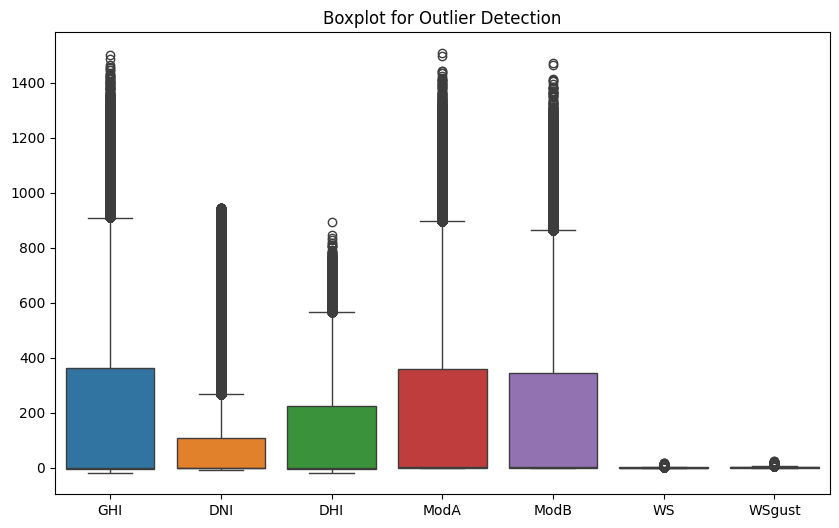

In [5]:
# Perform data quality check
data_quality = DataQualityCheck(df_sierraleone)
print(data_quality.check_missing_values())
data_quality.check_negative_values(['GHI', 'DNI', 'DHI'])
data_quality.plot_outliers(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])


## Data Cleaning

Based on the analysis, handling anomalies and missing values, especially in critical columns.

In [6]:
# Data cleaning
data_cleaning = DataCleaning(df_sierraleone)
df_sierraleone_cleaned = data_cleaning.drop_na_comments()
df_sierraleone_cleaned = data_cleaning.fill_missing_values('GHI', df_sierraleone_cleaned['GHI'].mean())

## Time Series Analysis

Plotting line graphs for GHI, DNI, DHI, and Tamb over time to observe patterns and trends.

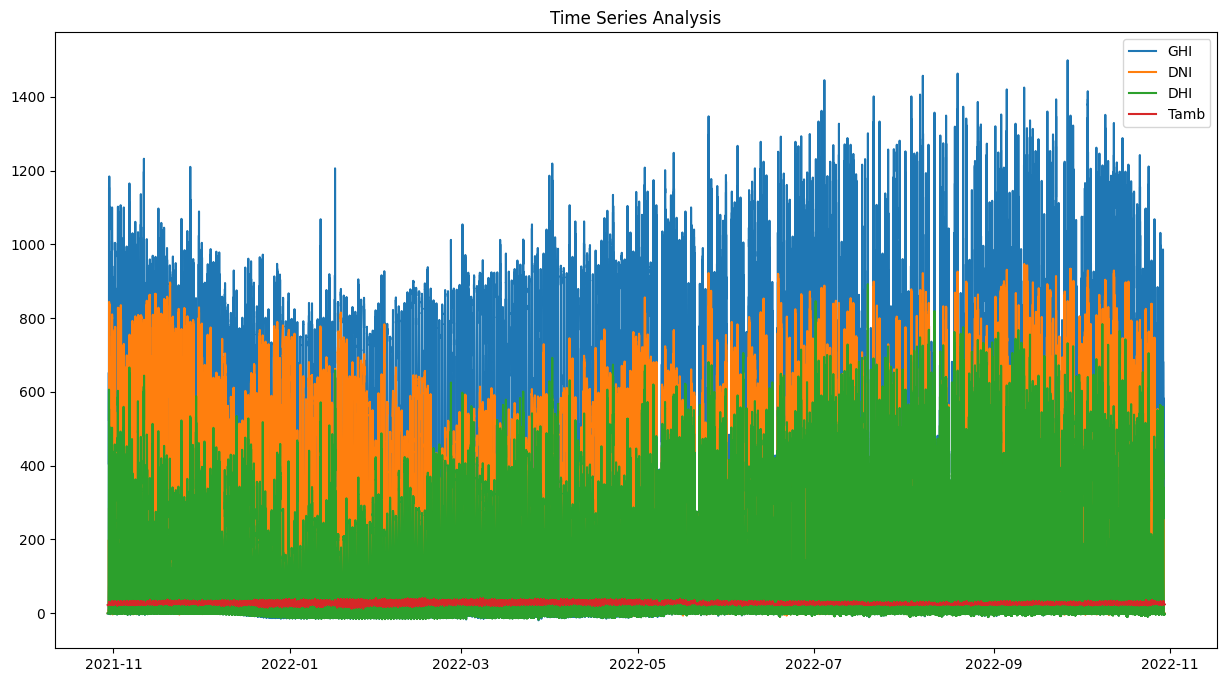

In [7]:
# Time series analysis
time_series = TimeSeriesAnalysis(df_sierraleone)
time_series.plot_time_series(['GHI', 'DNI', 'DHI', 'Tamb'])

## Impact of Cleaning on Sensor Readings

Evaluating how the cleaning process (based on the 'Cleaning' column) affects the sensor readings (ModA, ModB) over time.


## Correlation Analysis

Using heatmaps and scatter plots to visualize correlations between variables like solar radiation components and temperature.

In [8]:
# Correlation analysis
correlation_analysis = CorrelationAnalysis(df_sierraleone)
correlation_analysis.plot_correlation_matrix(['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS'])
correlation_analysis.plot_pairplot(['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS'])

2024-08-23 09:52:03.819 
  command:

    streamlit run c:\Moonlight-Energy-Solutions-solar-farm-data-Analysis\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

## Wind Analysis

Using polar plots to identify trends in wind speed and direction.

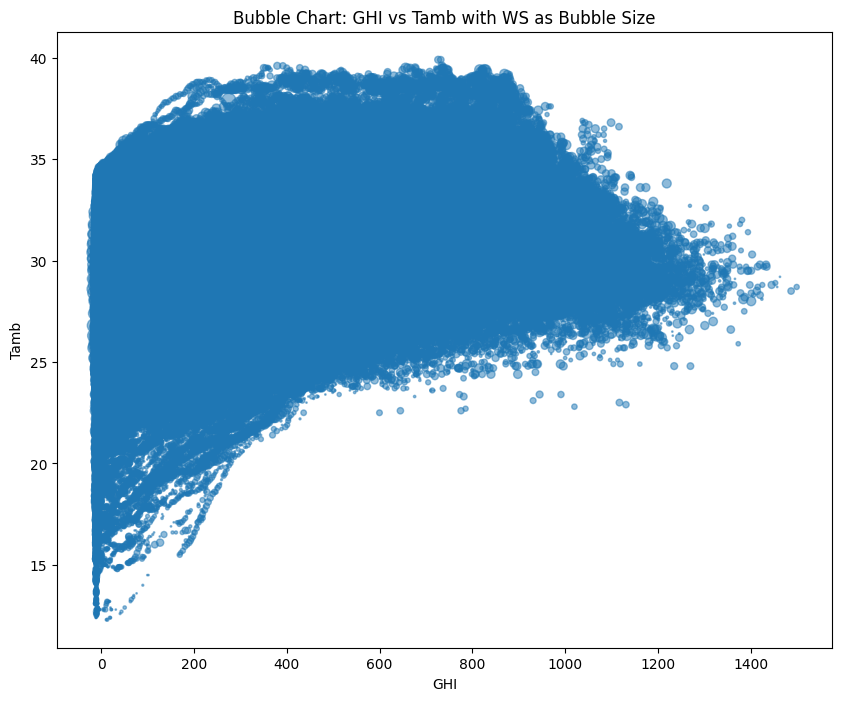

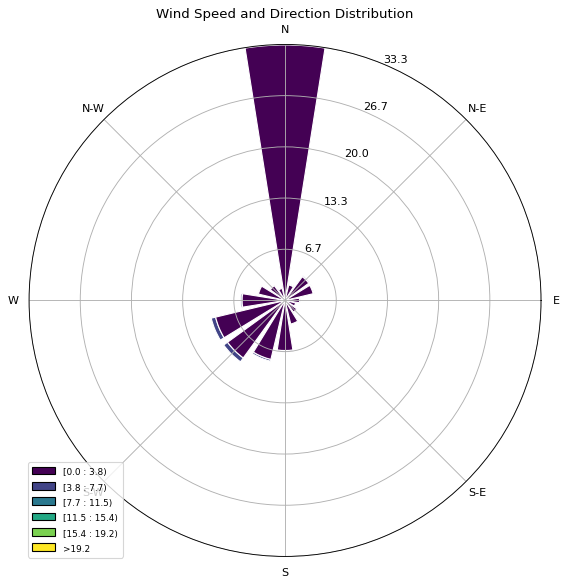

In [15]:
# Wind analysis
wind_analysis = WindAnalysis(df_sierraleone)
wind_analysis.plot_wind_rose()

## Temperature and Humidity Analysis

Examining how relative humidity (RH) influences temperature readings and solar radiation.

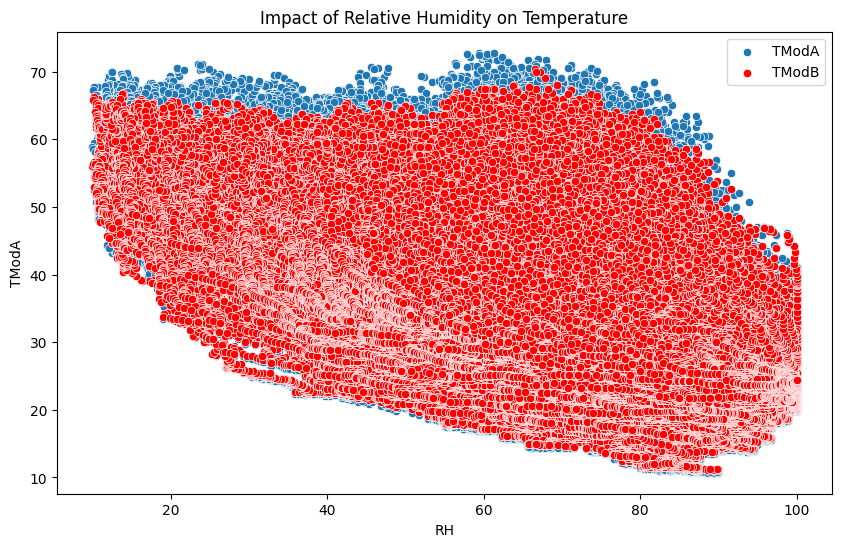

In [16]:
# Temperature and humidity analysis
temp_humidity = TemperatureHumidityAnalysis(df_sierraleone)
temp_humidity.plot_temperature_vs_humidity()

## Histograms

Creating histograms for GHI, DNI, DHI, WS, and temperature to understand their distributions.

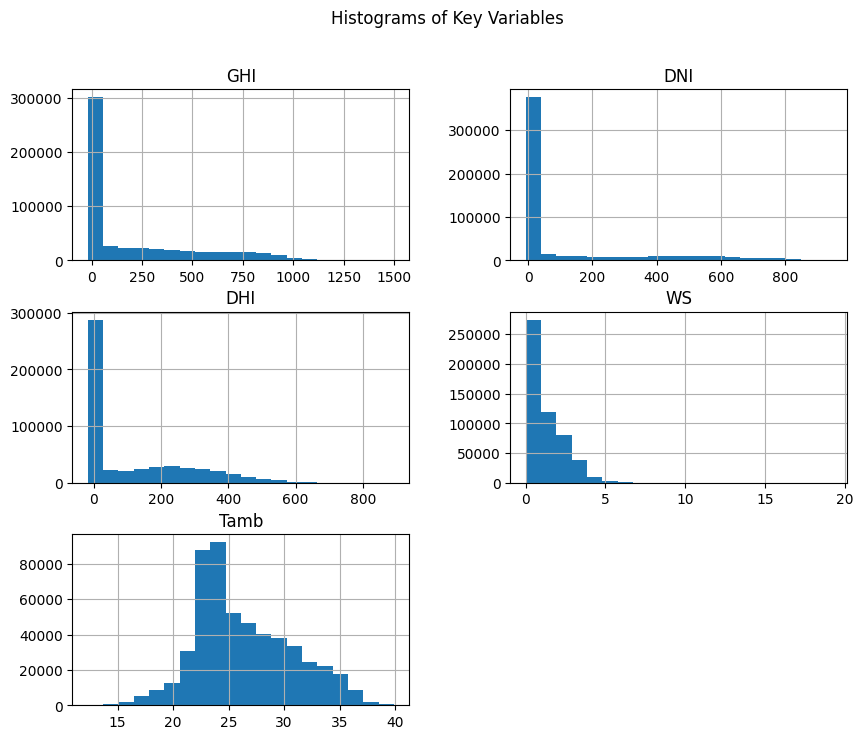

In [17]:
# Histograms
histograms = Histograms(df_sierraleone)
histograms.plot_histograms(['GHI', 'DNI', 'DHI', 'WS', 'Tamb'])

## Z-Score Analysis

Calculating Z-scores to identify significant outliers in the data.

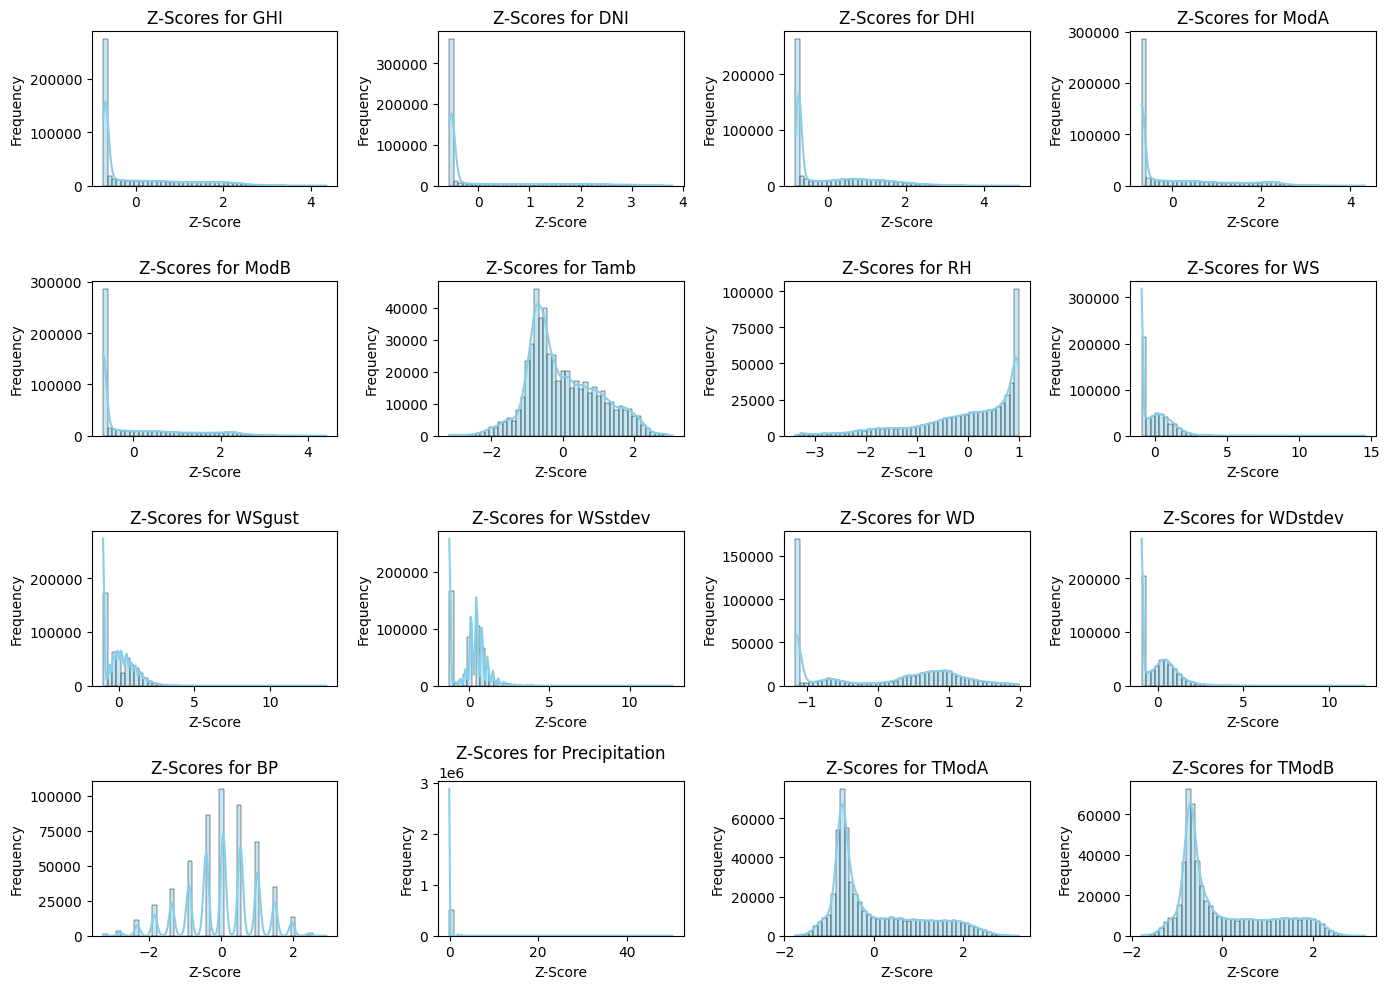

In [13]:
# Define columns for Z-score analysis
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']

# Z-score analysis
z_score_analysis = ZScoreAnalysis(df_sierraleone)
z_score_analysis.calculate_z_scores(columns_to_analyze)
z_score_analysis.plot_z_scores()  # This should now work

## Bubble Charts

Creating bubble charts to explore relationships between variables such as GHI vs. Tamb vs. WS.

In [23]:
# Bubble charts
bubble_charts = BubbleCharts(df_sierraleone)
bubble_charts.plot_bubble_chart('GHI', 'Tamb', 'WS')

NameError: name 'st' is not defined